In [1]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
filename= ['data1.mat','data2.mat','data3.mat']
data_base_1 = loadmat(filename[0])
data_base_2 = loadmat(filename[1])
data_base_3 = loadmat(filename[2])
data_base_1,data_base_2,data_base_3

({'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
  '__version__': '1.0',
  '__globals__': [],
  'X': array([[3.38156267, 3.38911268],
         [4.52787538, 5.8541781 ],
         [2.65568187, 4.41199472],
         [2.76523467, 3.71541365],
         [2.84656011, 4.17550645],
         [3.89067196, 6.48838087],
         [3.47580524, 3.63284876],
         [5.91129845, 6.68076853],
         [3.92889397, 5.09844661],
         [4.56183537, 5.62329929],
         [4.57407171, 5.39765069],
         [4.37173356, 5.46116549],
         [4.19169388, 4.95469359],
         [5.24408518, 4.66148767],
         [2.8358402 , 3.76801716],
         [5.63526969, 6.31211438],
         [4.68632968, 5.6652411 ],
         [2.85051337, 4.62645627],
         [5.1101573 , 7.36319662],
         [5.18256377, 4.64650909],
         [5.70732809, 6.68103995],
         [3.57968458, 4.80278074],
         [5.63937773, 6.12043594],
         [4.26346851, 4.68942896],
         [2.5

50

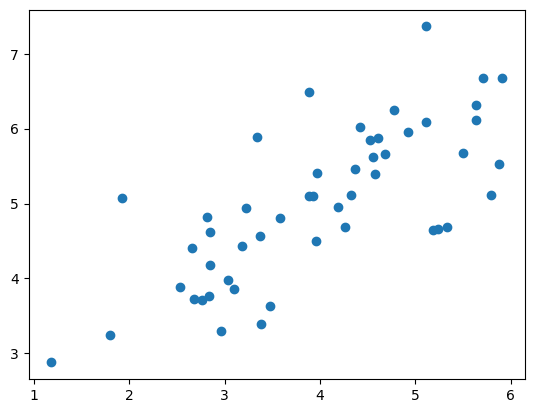

In [3]:
plt.scatter(data_base_1['X'][:,0],data_base_1['X'][:,1])
len(data_base_1['X'])

In [4]:
# x = data_base["X"]
# x -= x.mean(axis=0) 	# 见详注1
# C = x.T.dot(x)    		# 计算自协方差矩阵
# lam,v= np.linalg.eig(C)    	# 特征分解，v是
# new_index = np.argsort(lam)[::-1]    # 特征值排序，见详注2
# A = -v[:,new_index]					 # 得到A
# w = x.dot(A)						 # 计算变换后的特征
# r = lam[new_index]/lam.sum()		 # 计算所有特征对应的贡献率
# r

def pca(data,n_dim):
    N,D = np.shape(data)
    data = data - np.mean(data,axis=0,keepdims=True)
    C = np.dot(data.T,data)/(N-1)
    
    #计算特征值和特征向量
    eig_values,eig_vector = np.linalg.eig(C)
    
    #将特征值进行排序选取n_dim个最大的特征值
    index_ = np.argsort(-eig_values)[:n_dim]
    
    #选取相应的特征向量组成降维矩阵
    picked_eig_vector = eig_vector[:,index_]
    
    #对数据进行降维
    data_ndim = np.dot(data,picked_eig_vector)
    return data_ndim,picked_eig_vector
def draw_pic(datas,labs):
    plt.cla()
    unque_labs = np.unique(labs)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1,len(unque_labs))]
    p=[]
    legends = []
    for i in range(len(unque_labs)):
        index = np.where(labs==unque_labs[i])
        pi = plt.scatter(datas[index, 0], datas[index, 1], c =[colors[i]] )
        p.append(pi)
        legends.append(unque_labs[i])
    
    plt.legend(p, legends)
    plt.show()

In [5]:
data_2d,picked_eig_vector = pca(data_base_1['X'],2)
data_2d,picked_eig_vector

(array([[-1.49876595, -0.85264807],
        [ 0.95839024,  0.31052167],
        [-1.40325172,  0.39797881],
        [-1.76421694, -0.20776957],
        [-1.40760243,  0.0941001 ],
        [ 0.87367998,  1.20554431],
        [-1.27050164, -0.72543036],
        [ 2.5506712 ,  0.0620213 ],
        [ 0.01469839,  0.11214191],
        [ 0.83694188,  0.11125149],
        [ 0.70212917, -0.07011155],
        [ 0.58711016,  0.10806108],
        [ 0.12493311, -0.16638462],
        [ 0.74690506, -1.0645205 ],
        [-1.67629396, -0.21244075],
        [ 2.10275704, -0.04507983],
        [ 0.9594953 ,  0.06393754],
        [-1.11633715,  0.43839055],
        [ 2.37070273,  1.09891406],
        [ 0.69001651, -1.0367188 ],
        [ 2.39397485,  0.19259784],
        [-0.44284714,  0.10794816],
        [ 1.98340505, -0.19512183],
        [ 0.01058959, -0.41626956],
        [-1.83205377,  0.06844963],
        [-0.62719172,  0.44289195],
        [ 1.33171608,  0.1313861 ],
        [ 1.4546727 , -1.071

In [6]:
# k = (picked_eig_vector[0][1]-picked_eig_vector[1][1])/(picked_eig_vector[0][0]-picked_eig_vector[1][0])
# b = picked_eig_vector[0][1] - k*picked_eig_vector[0][0]
# x = np.arange(-2,2)
# y = k*x+b

# plt.plot(picked_eig_vector.T[:,0],picked_eig_vector.T[:,1])
# plt.scatter(picked_eig_vector[:,0],picked_eig_vector[:,1])
# plt.scatter(data_2d[:,0],data_2d[:,1])

50
